In [1]:
from scipy import ndimage
import imageio                     #This is v2 (For now) and if want explicty is 'import imageio.v2 as imageio` or call `imageio.v2.imread`
import numpy as np
from matplotlib.pyplot import*
from scipy.optimize import leastsq
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import statistics
import latexify

# Foto original

/tmp/ipykernel_12998/2523104476.py:1: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image =imageio.imread('imagepump.tif')                    # Carga la imagen


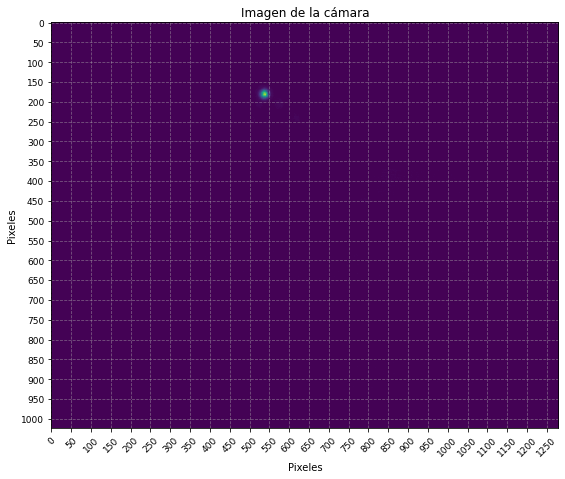

In [2]:
image =imageio.imread('imagepump.tif')                            #Load image 
Tamañoplot=20
im0=image[:,:,1]                                                  #Select image layer
fig =figure(figsize=(Tamañoplot,Tamañoplot))               
subplot(221)
imshow(im0)                                                       #Image plot
xlabel('Pixels')
ylabel('Pixels')
yticks(np.arange(0, im0.shape[0], 50),size=9)
xticks(np.arange(0, im0.shape[1], 50), rotation=45,size=9)
title('Camera image')
grid(linestyle='--',alpha=0.5)                                    #Image grid
show()

# Zoom de la imagen

Upper limit in Y axis (Pixel):  150
Lower limit in Y axis (Pixel):  250
Upper limit in X axis (Pixel):  500
Upper limit in X axis (Pixel):  600


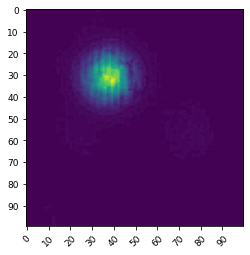

In [5]:
x1 = int(input("Upper limit in Y axis (Pixel): "))         #Upper limit
x2 = int(input("Lower limit in Y axis (Pixel): "))         #Lower limit 
y1 = int(input("Upper limit in X axis (Pixel): "))         #Left limit
y2 = int(input("Upper limit in X axis (Pixel): "))         #Right limit 
zoom = im0[x1:x2,y1:y2] 

imshow(zoom)
yticks(np.arange(0, zoom.shape[0], 10),size=9)
xticks(np.arange(0, zoom.shape[1], 10), rotation=45,size=9)
show()

### Indentificar posición donde están los peak máximos

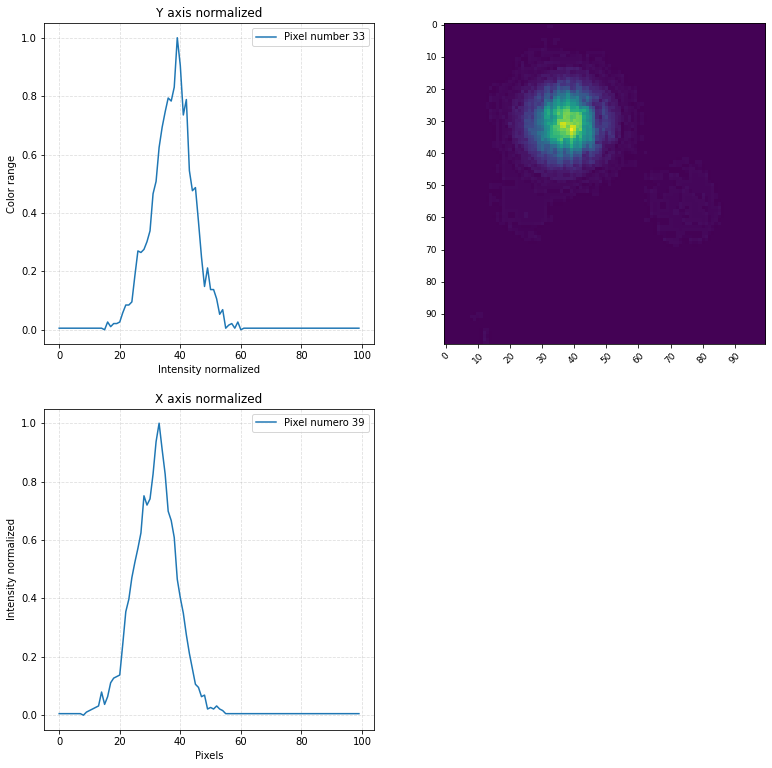

In [6]:
a=np.where(zoom == zoom.max())                                   #Array with two columns, the first is X axis and second is Y axis. 
option=2
if option==1:
    X=zoom[:,a[1][1]]                                            #One of the array that contains a maximum
    Perfilnormx=X/max(X)                                         #Cross-section but is normalized
    pixelesx=range(len(X))

    Y= zoom[a[0][1],:]                                           # one of the array that contains a maximum
    Perfilnormy=Y/max(Y)                                         #Cross-section but is normalized
    pixelesy=range(len(Y))

    fig =figure(1,figsize=(13,13))
    ############################CROSS SECTION IN X AXIS##############################
    subplot(221)        
    plot(pixelesy,Perfilnormy,label='Pixel number '+str(a[0][1]))
    legend(loc=0)
    xlabel('Intensity normalized')
    ylabel('Color range')
    title('X axis normalized')
    grid(linestyle='--',alpha=0.4)
    ############################ORIGINAL IMAGE########################################
    subplot(222)  
    imshow(zoom)
    yticks(np.arange(0, zoom.shape[0], 10),size=9)
    xticks(np.arange(0, zoom.shape[1], 10), rotation=45,size=9)
    ############################CROSS SECTION IN Y AXIS##############################
    subplot(223)         
    plot(pixelesx,Perfilnormx,label='Pixel number '+str(a[1][1]))
    legend(loc=0)
    xlabel('Pixels')
    ylabel('Intensity normalized')
    title('Y axis normalized')
    grid(linestyle='--',alpha=0.4)
    show()
elif option==2:
    X=zoom[:,a[1][0]]                                                               # one of the array that contains a maximum
    Perfilnormx=X/max(X)                                                            #Cross-section but is normalized
    pixelesx=range(len(X))
    Y= zoom[a[0][0],:]                                                              # one of the array that contains a maximum
    Perfilnormy=Y/max(Y)                                                            #Cross-section but is normalized
    pixelesy=range(len(Y))

    fig =figure(1,figsize=(13,13))
    ############################CROSS SECTION IN X AXIS##############################
    subplot(221)        
    plot(pixelesy,Perfilnormy,label='Pixel number '+str(a[0][0]))
    legend(loc=0)
    xlabel('Intensity normalized')
    ylabel('Color range')
    title('Y axis normalized')
    grid(linestyle='--',alpha=0.4)
    ############################ORIGINAL IMAGE########################################
    subplot(222)  
    imshow(zoom)
    yticks(np.arange(0, zoom.shape[0], 10),size=9)
    xticks(np.arange(0, zoom.shape[1], 10), rotation=45,size=9)
    ############################CROSS SECTION IN Y AXIS##############################
    subplot(223)         
    plot(pixelesx,Perfilnormx,label='Pixel numero '+str(a[1][0]))
    legend(loc=0)
    xlabel('Pixels')
    ylabel('Intensity normalized')
    title('X axis normalized')
    grid(linestyle='--',alpha=0.4)
    show()

# Ajuste a perfil seleccionado

In [7]:
@latexify.with_latex
def func1(x,a,b,c,d):
    return a*(np.exp(-2*((x-b)**2)/c**2)) +d
func1

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x7f0d1d94fe50>

ax opt.= 165.8| ax input:189
bx opt.= 32.28| bx input:39
cx opt.= 13.38| cx input:7
dx opt.= 1.34| dx input:0
ay opt.= 160.32| ay input:189
by opt.= 38.27| by input:33
cy opt.= 12.72| cy input:7
dy opt.= 1.69| dy input:0


Write the name of image:  image0


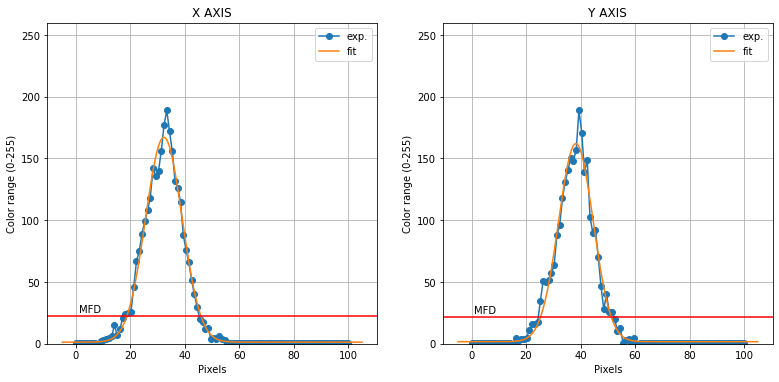

In [9]:
#######################FIT X AXIS##################################
bandx= 7#std(X,ddof=1)#float(input('Ingrese el ancho en X estimado de sus datos para realizar el ajuste en pixeles: ')) 
x= np.linspace(0,len(X),len(X))

def eps1(p,x):
    return func1(x,p[0],p[1],p[2],p[3])-X
parametros1=[max(X),int(np.mean(a[0])),bandx,min(X)]   
   
(anchox,bx,cx,dx),_=leastsq(eps1,parametros1,args=(x))

print('ax opt.= '+str(round(anchox,2))+'| ax input:'+str(max(X))        )
print('bx opt.= '+str(round(bx,2))+'| bx input:'+str(int(np.mean(a[1]))))
print('cx opt.= '+str(round(cx,2))+'| cx input:'+str(round(bandx))      )
print('dx opt.= '+str(round(dx,2))+'| dx input:'+str(min(Y))            )

#######################FIT Y AXIS##################################
bandy= 7#std(Y,ddof=1) #float(input('Ancho en Y estimado para realizar el ajuste en pixeles: ')) 
y= np.linspace(0,len(Y),len(Y))
#Input for seeds values , a=peak, b=where is center,c=bandwidth, d= displacement in Y
def eps0(p,x):
    return func1(x,p[0],p[1],p[2],p[3])-Y
parametros0=[max(Y),int(np.mean(a[1])),bandy,min(Y)]   
(anchoy,by,cy,dy),_=leastsq(eps0,parametros0,args=(y))

print('ay opt.= '+str(round(anchoy,2))+'| ay input:'+str(max(Y))      )
print('by opt.= '+str(round(by,2))+'| by input:'+str(int(np.mean(a[0])))) 
print('cy opt.= '+str(round(cy,2))+'| cy input:'+str(round(bandy))    )
print('dy opt.= '+str(round(dy,2))+'| dy input:'+str(min(Y))          )
################################## Functions ########################
extension=5
xx1=np.linspace(0-extension,len(X)+extension,2000)
xx2=np.linspace(0-extension,len(Y)+extension,2000)
Gaussx=func1(xx1,anchox,bx,cx,dx)
Gaussy= func1(xx2,anchoy,by,cy,dy)
MFDx=round(max(Gaussx*(1/np.e**2)),2)
MFDy=round(max(Gaussy*(1/np.e**2)),2)
#####################################################################
##################################PLOT FITS##########################

fig =figure(1,figsize=(13,13))
subplot(221) 
plot(x,X,'o-',label='exp.')
plot(xx1,Gaussx,label='fit')
grid()
xlabel('Pixels')
ylabel('Color range (0-255)')
title('X AXIS')
text(1, MFDx+3, 'MFD', fontdict=None)
axhline(y = MFDx, color = 'r', linestyle = '-')
ylim(0,260)
legend(loc=0)

subplot(222)
plot(y,Y,'o-',label='exp.')
plot(xx2,Gaussy,label='fit')
grid()
xlabel('Pixels')
ylabel('Color range (0-255)')
text(1, MFDy+3, 'MFD', fontdict=None)
axhline(y = MFDy, color = 'r', linestyle = '-')
title('Y AXIS')
legend(loc=0)
ylim(0,260)
nameimg=input('Write the name of image: ')
savefig('Image/'+str(nameimg)+'.png')
show()

In [10]:
############################
## R-SQUARE ################
######################## X AXIS#################################
xx= np.linspace(0,len(X),len(X))               #Matrix with less point so you can do the direct subtraction.
rsquarex = r2_score(X,func1(xx,anchox,bx,cx,dx))
print('R-square in X axis is: '+str(round(rsquarex,4)))

######################## Y AXIS#################################
yy= np.linspace(0,len(Y),len(Y))               #Matrix with less point so you can do the direct subtraction.
rsquarey =r2_score(Y, func1(yy,anchoy,by,cy,dy))
print('R-square in Y axis: '+str(round(rsquarey,4)))

R-square in X axis is: 0.9903
R-square in Y axis: 0.9826


### Cálculo del MFD
The mode field diameter desscribes the width of gaussian intensity profile inside the single mode fiber. Single mode fibers have one guided mode, and wave optics analysis reveals the mode to be described by a Bessel function. The amplitude profiles of Gaussian and Bessel functions closely resemble one another.
The MFD, which is constant along the fiber's length, is the width measured at an intensity equal to the product of $e^{-2}$ and the peak intensity. The MFD encloses $\approx 86\%$ of the beam's power.


In [11]:
print("The MFD of x-axis is in y="+ str(MFDx))
print("The MFD of y-axis is in y="+ str(MFDy))

The MFD of x-axis is in y=22.62
The MFD of y-axis is in y=21.93


In [12]:
tolerance=0.6

valorindex=[]
magnificacion = []
MDF_test=[4.5,4.6,5,5.3,5.5]                                                                    #Differents MFD 
for j in MDF_test:
    for i in range(0,len(Gaussx)):
        if MFDx-tolerance<Gaussx[i]<MFDx+tolerance:
            valorindex.append(Gaussx[i])
    firstp, lastp=np.where(Gaussx==valorindex[0]), np.where(Gaussx==valorindex[-1])                      
    mfdF=xx2[lastp[0]]-xx2[firstp[0]]                                                        
    # print('El primer pixel es '+str(firstp[0])+ ' y el segundo pixel es el '+str(lastp[0]))
    # print(str(round(mfdF[0]*3.7,2))+' micrometros')
    Mag= round((mfdF[0]*3.6)/j,2)  # Cambiar             
    magnificacion.append(Mag)
    print(j,"|"+ str(magnificacion[-1]))

4.5 |21.79
4.6 |21.32
5 |19.61
5.3 |18.5
5.5 |17.83
